In [1]:
from DataParser import DataParser
from DataProcessing import DataProcessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys


# Data

In [2]:
df = DataProcessing().Dataset;




# Feature Engineering

### loan_amnt 
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [3]:
num = 0
for i in df.columns:
    print( str(num) + " : " + str(i))
    num = num + 1
    
def plot_feature(feature):
    feature_label_0 = df.loc[df[DataProcessing().TargetClass] == 1][feature]
    feature_label_1 = df.loc[df[DataProcessing().TargetClass] == 2][feature]
    bins=np.histogram(np.hstack((feature_label_0,feature_label_1)), bins=40)[1] #get the bin edges

    fig, ax = plt.subplots(figsize=(12,6),sharey=True)
    sns.despine(left=True)
    ax = sns.distplot(feature_label_0, bins=bins, color='r', label="Bad Loan", kde=False)
    ax = sns.distplot(feature_label_1, bins=bins, color='g', label="Good Loan", kde=False)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of samples')
    ax.legend()
    plt.show()



0 : Month
1 : CreditAMT
2 : Installment
3 : Residence
4 : Age
5 : ExistCredits
6 : Liability
7 : Predict
8 : Status_0 DM
9 : Status_< 200 DM
10 : Status_No checking acount
11 : Credit_all credits at this bank paid back duly
12 : Credit_critical account/other credits existing (not at this bank)
13 : Credit_delay in paying off in the past
14 : Credit_existing credits paid back duly till now
15 : Credit_no credits taken/all credits paid back duly
16 : Purpose_business
17 : Purpose_car (new)
18 : Purpose_car (used)
19 : Purpose_domestic appliances
20 : Purpose_education
21 : Purpose_furniture/equipment
22 : Purpose_others
23 : Purpose_radio/television
24 : Purpose_repairs
25 : Purpose_retraining
26 : Savings_100 <= X <  500 DM
27 : Savings_500 <= X < 1000 DM
28 : Savings_X < 100 DM
29 : Savings_X >= 1000 DM
30 : Savings_unknown/ no savings account
31 : Employment_1 <= X < 4 years
32 : Employment_4 <= X < 7 years
33 : Employment_X < 1 year
34 : Employment_X >= 7 years
35 : Employment_unempl

### Feature Ranking


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X = df
y = df[DataProcessing().TargetClass]

X = X.drop(DataProcessing().TargetClass, 1)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)



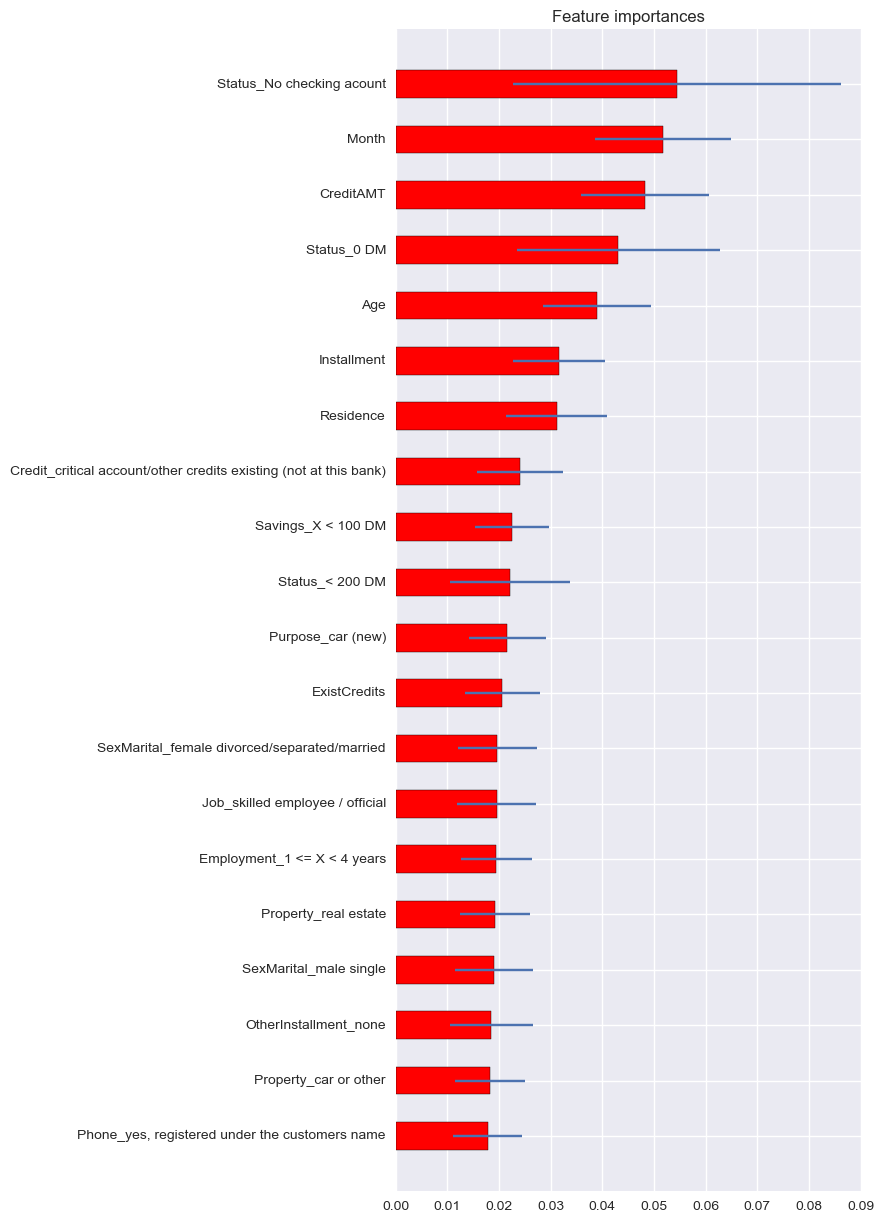

In [5]:
to = 20

indices_top = indices[::-1][:to][::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(6, 15))
plt.title("Feature importances")
plt.barh(range(len(indices_top)), importances[indices_top],
       color="r", xerr=std[indices_top], align="center", height=0.5)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
column_names_ordered_importance = X.columns[indices_top]

plt.yticks(range(len(indices_top)), column_names_ordered_importance)
plt.ylim([-1, len(indices_top)])
plt.show()



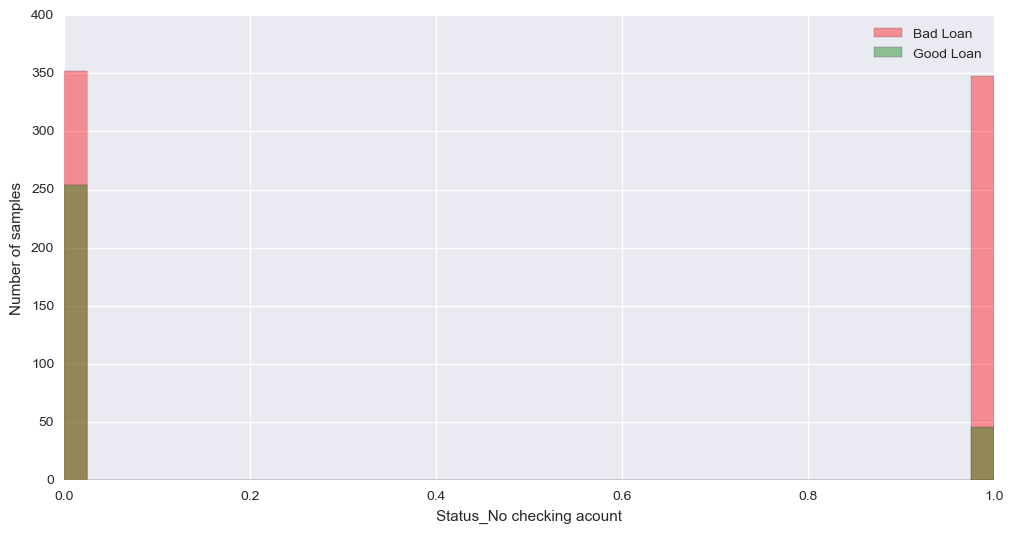

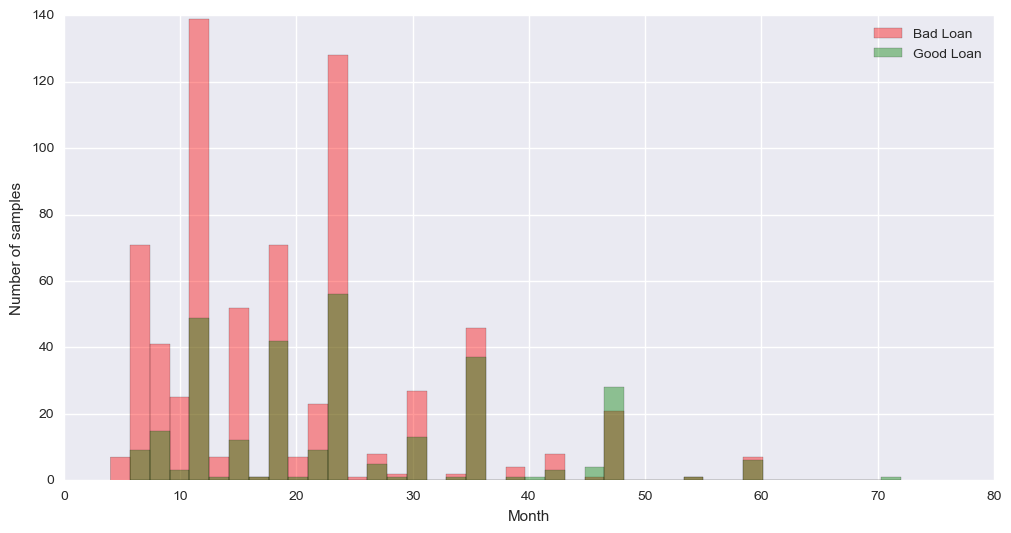

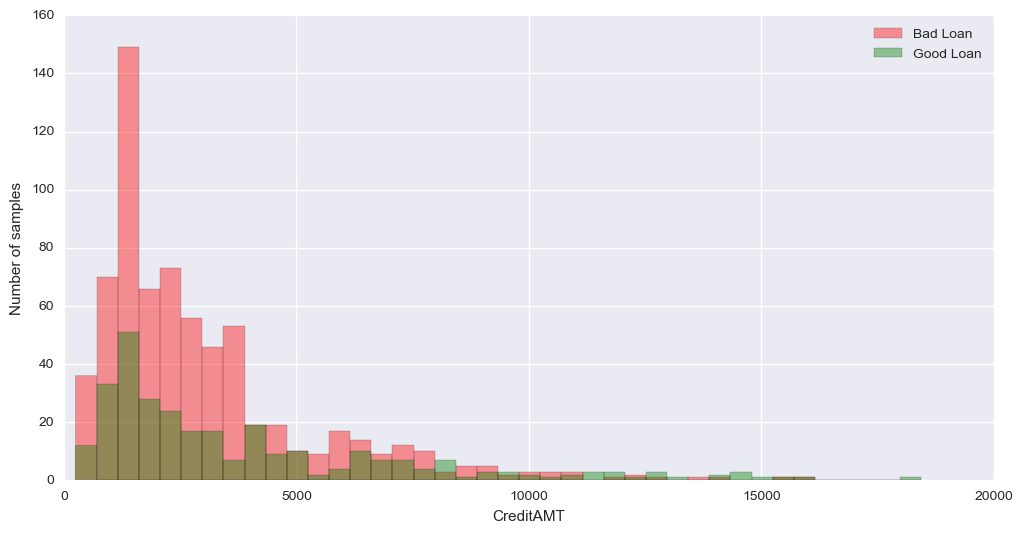

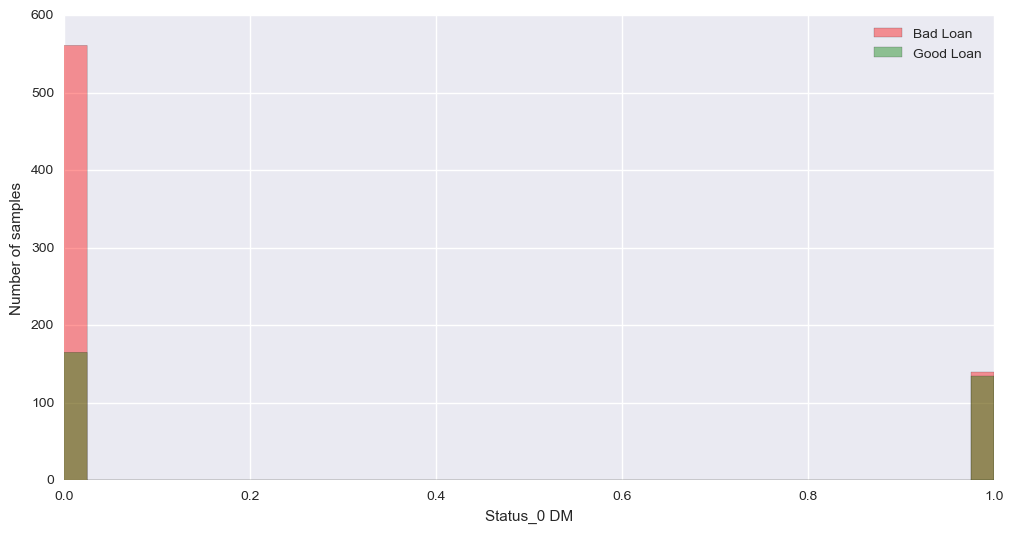

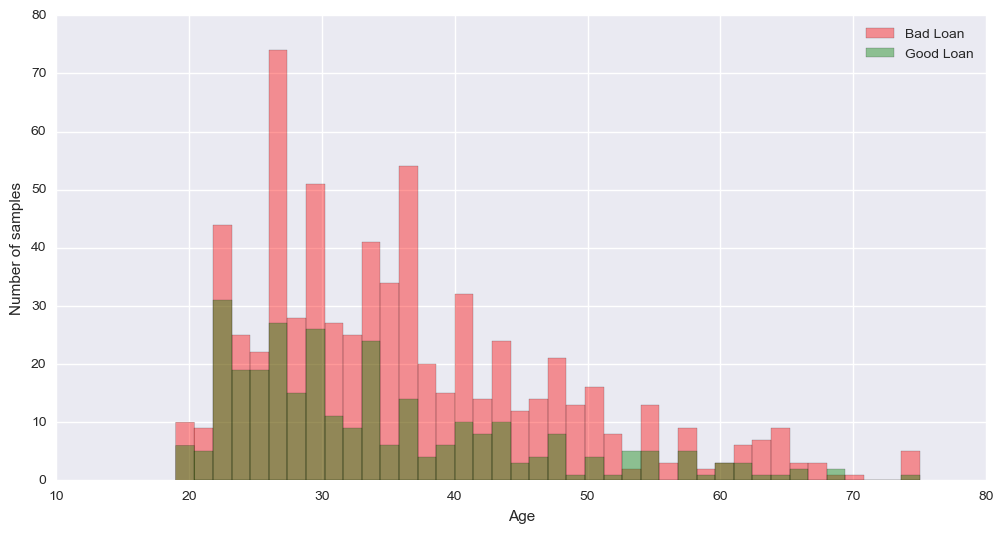

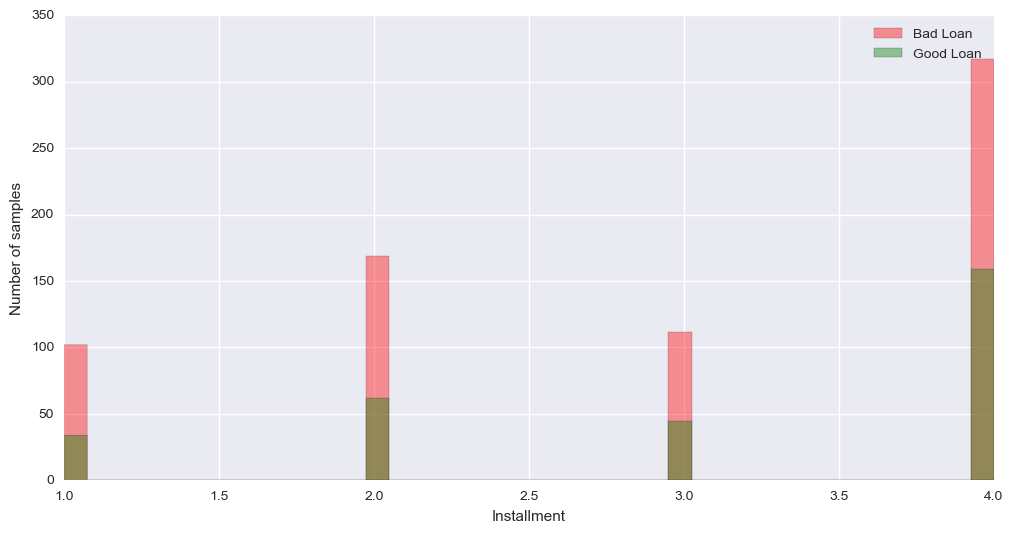

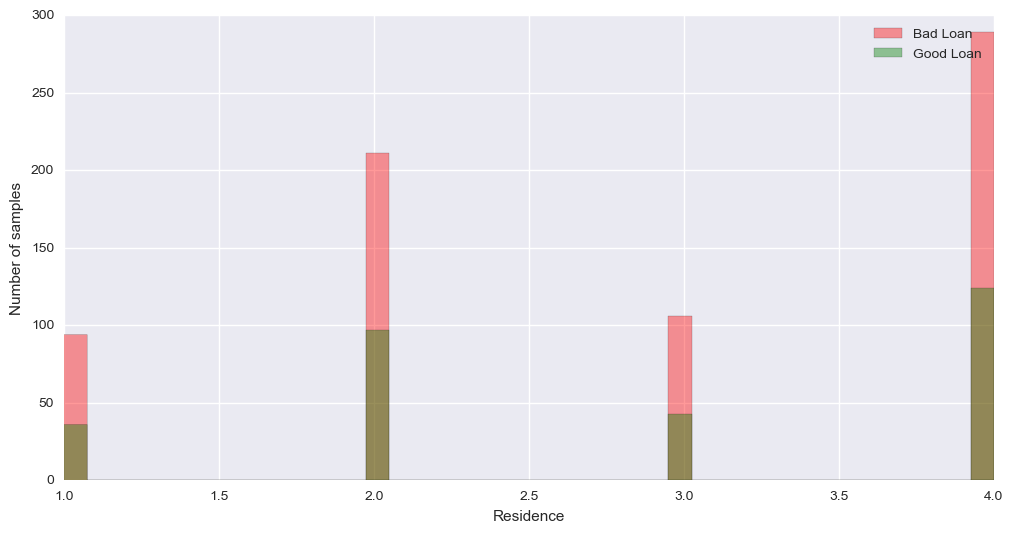

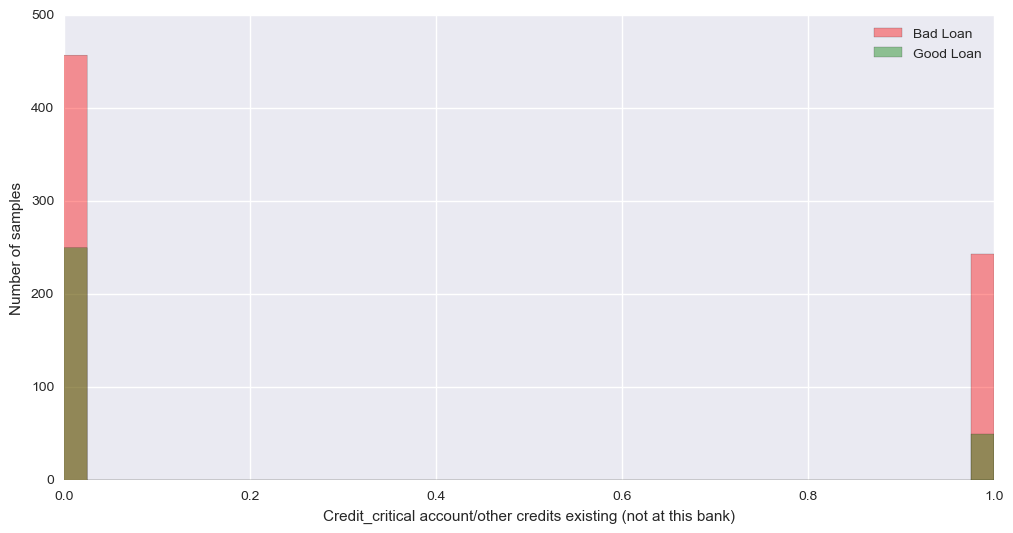

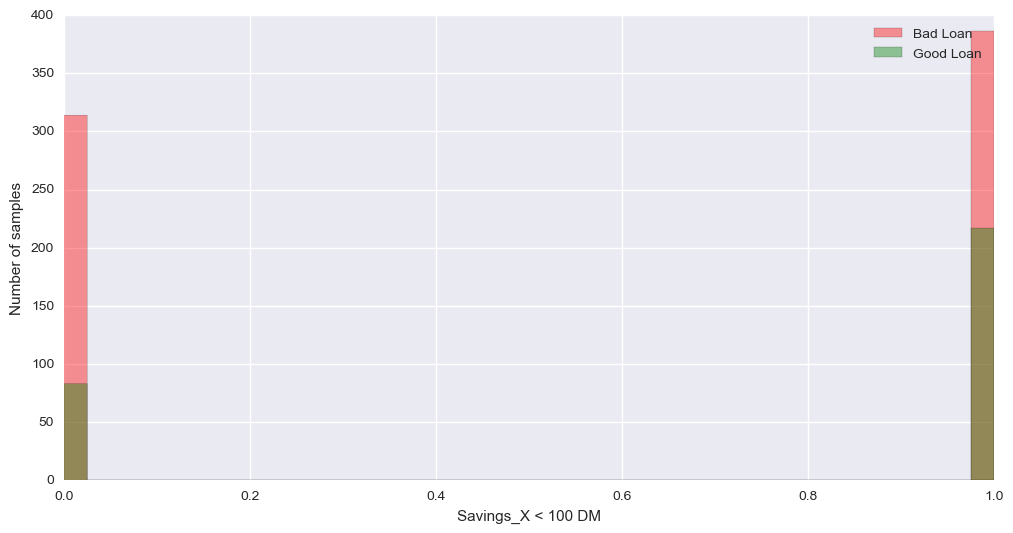

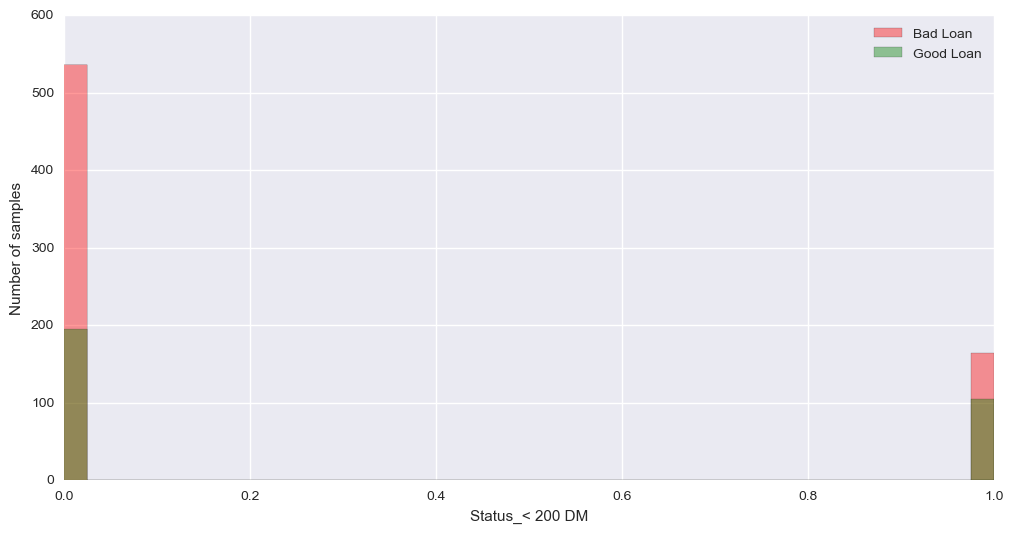

In [6]:
indices_best_to_worst = indices[::-1] 
indices_best = indices_best_to_worst[:10]

for i in indices_best:
    plot_feature(X.columns[i])
    


# plot_feature('current_upb')
# plot_feature('svcg_cycle')
# plot_feature('loan_age')

In [7]:
import datetime
import platform
import random

def format_dataset(df, target_class):
    assert isinstance(df, pd.DataFrame)
    labels = df[target_class].values
#     if Globals.GERMAN_DATA:
#         labels = labels - 1
    # one hot a list of integers
    one_hot_labels = np.eye(np.max(labels) + 1)[labels]
    # remove first column - full of 0's
    # if Globals.GERMAN_DATA:
    #     one_hot_labels = np.delete(one_hot_labels, np.s_[0:1], axis=1)
    df = df.drop([target_class], axis=1)
    data = df.values
    # Standardise features
    # data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    # data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    
    data = pd.DataFrame(data)
    
    for column in data: 
        # if not one-hot-encoded
        if 1 != (data[column].max() - data[column].min()):
#             data[column] = (data[column] - data[column].mean()) / data[column].std()
            data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    
    # Remove nan values     
    data = data.fillna(0)

    return (np.array(data),one_hot_labels)

def create_train_validation_datasets(df, target_class):
    assert isinstance(df, pd.DataFrame)
    training_set_size = 0.8 * len(df)
    random.seed(len(df) + datetime.datetime.now().day + 1)
    # print(len(df) + datetime.datetime.now().day)
    # random.seed(len(df))
    sudo_ran_sample = [random.randint(1, len(df)) for i in range(1, len(df))]
    msk = np.array(sudo_ran_sample) < training_set_size
    (train_data, train_labels) = format_dataset(df.iloc[msk], target_class)
#     if self.UPSAMPLING:
#         (train_data, train_labels) = self.upsample_training_data(train_data, train_labels)

#     if self.UPSAMPLING_ALL:
#         (train_data, train_labels) = self.upsample_all(train_data, train_labels)
#     # Shuffle dataset?????

    (validation_data, validation_labels) = format_dataset(df.iloc[~msk], target_class)

    # Shuffle dataset?????

#     self.print_class_ratios(train_labels, "Training Class ratios BEFORE")
#     self.print_class_ratios(validation_labels, "Validation Class ratios BEFORE")

    return ((train_data, train_labels) , (validation_data, validation_labels))

In [8]:

(train, validation) = create_train_validation_datasets(df, DataProcessing().TargetClass)


In [9]:
df_train = pd.DataFrame(validation[0])
df_fresh = pd.DataFrame(df)
# print pd.DataFrame(validation[0]).isnull().sum()
# print pd.DataFrame(df).isnull().sum()

print(df_train.max() - df_train.min())
print(df_fresh.max() - df_fresh.min())



0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    0.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
dtype: float64
Month                                                                   68
CreditAMT                                                            18174
Installment                                                              3
Residence                                                                3
Age                                                                     56
ExistCredi

     40  41  42
0     0   0   1
1     0   0   1
2     0   0   1
3     0   1   0
4     0   0   1
5     0   0   1
6     0   0   1
7     0   0   1
8     0   0   1
9     0   0   1
10    0   0   1
11    0   0   1
12    0   0   1
13    0   0   1
14    0   0   1
15    0   0   1
16    0   0   1
17    0   0   1
18    0   0   1
19    0   0   1
20    0   0   1
21    0   0   1
22    0   0   1
23    0   0   1
24    0   0   1
25    0   0   1
26    0   0   1
27    0   0   1
28    0   1   0
29    0   0   1
..   ..  ..  ..
970   0   1   0
971   0   0   1
972   1   0   0
973   1   0   0
974   0   0   1
975   0   0   1
976   0   1   0
977   0   0   1
978   0   0   1
979   0   0   1
980   0   0   1
981   0   0   1
982   0   0   1
983   0   0   1
984   0   0   1
985   0   0   1
986   0   0   1
987   0   0   1
988   0   0   1
989   0   0   1
990   0   0   1
991   0   0   1
992   0   0   1
993   0   0   1
994   0   0   1
995   0   0   1
996   0   0   1
997   0   0   1
998   0   0   1
999   0   0   1

[1000 r

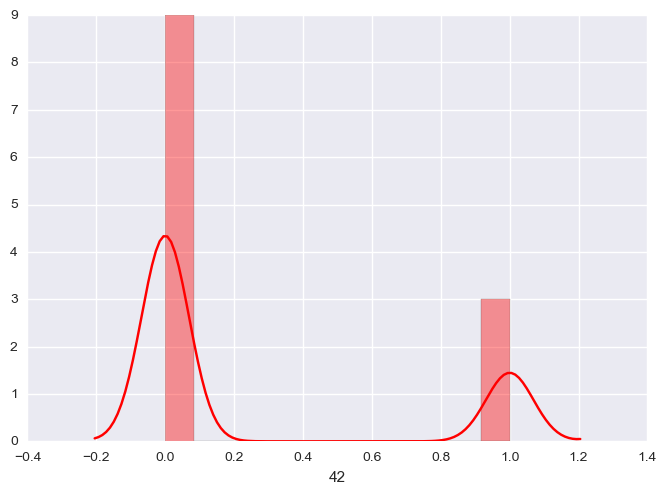

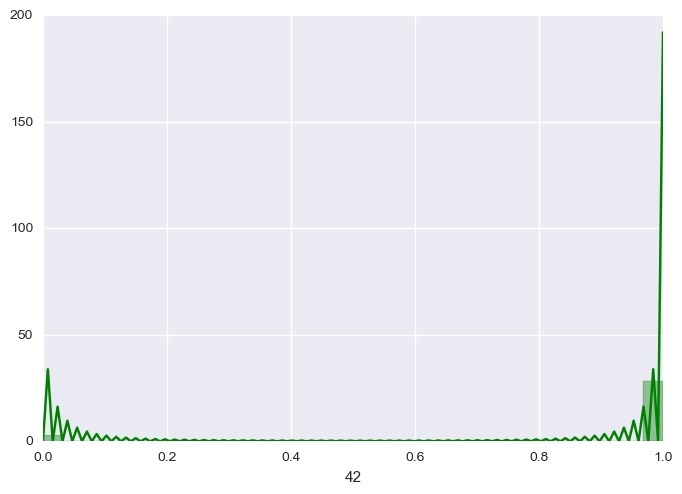

In [10]:
df_fresh.columns = range(0,len(df_fresh.columns))

print df_fresh.loc[:, 40:42]

sns.distplot(df_train[42], color='r')
plt.figure()
sns.distplot(df_fresh[42], color='g')